Assignment Title: Imagedata Augmentation and Image Classification

Authors: Koustab Ghosh1 & Sujoy Kumar Biswas2

Affiliation:

1. Researcher, IDEAS-TIH, Indian Statistical Institute, Kolkata
2. Head of Research & Innovation, IDEAS-TIH, Indian Statistical Institute, Kolkata
Dated: Sep 07th, 2025



I. Basic Image-Handling Processes with OpenCV
1. Reading and writing an image
2. Image transformations
Image transformations are important to augment the training dataset when the dataset size is small (i.e., the number of images is too few). In the following we shall see a few OpenCV functions to manage image data.

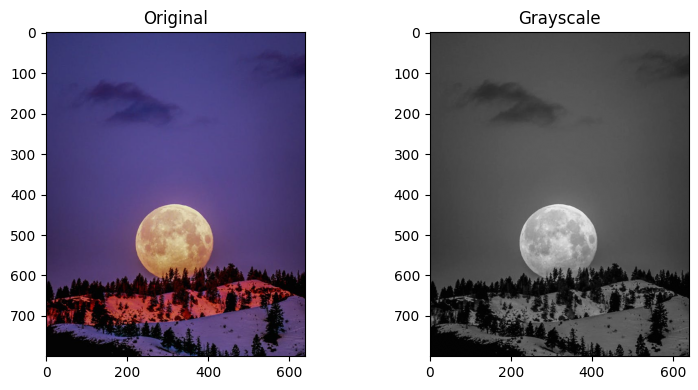

In [ ]:
# Method 1: Reading a color image an converting to grayscale image

import matplotlib.pyplot as plt
from PIL import Image

original = Image.open('moon-pexels-frank-cone (2).jpg')
grayscale = original.convert('L')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 21.2 MB/s eta 0:00:00


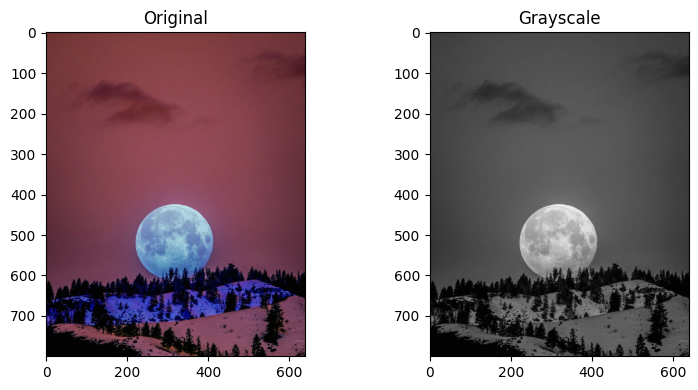

In [ ]:
# Method 2: Reading a color image an converting to grayscale image

import cv2
original = cv2.imread('moon-pexels-frank-cone (2).jpg')

# Use the cvtColor() function to grayscale the image
grayscale = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap='gray')
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

Question 1

Why do you think the color images displayed above look different (that is, Method 1 vs Method 2)?



1. OpenCV loads images in BGR (Blue–Green–Red) color order.

2. PIL and Matplotlib load images in RGB (Red–Green–Blue) color order.

3. When an image loaded using OpenCV is displayed with Matplotlib without converting BGR → RGB,the red and blue channels get swapped.

4. This causes the color difference between Method 1 (PIL/Matplotlib) and Method 2 (OpenCV).



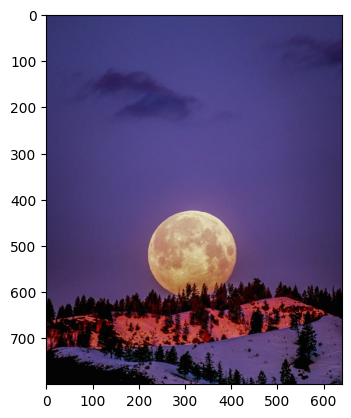

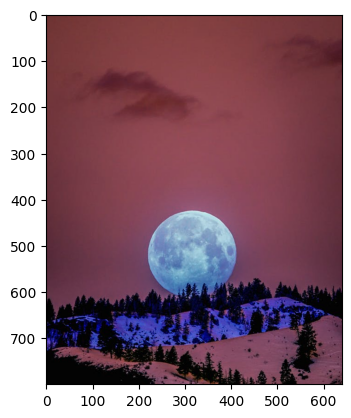

In [ ]:
# Method 1: Using PIL or Matplotlib
 # Correct colors (RGB)

from PIL import Image
import matplotlib.pyplot as plt

img1 = Image.open('moon-pexels-frank-cone (2).jpg')
plt.imshow(img1)
plt.show()

# Method 2: Using OpenCV
# Wrong colors (BGR order)
import cv2
img2 = cv2.imread('moon-pexels-frank-cone (2).jpg')
plt.imshow(img2)
plt.show()

II. Various Image Transformation

1. Grayscale conversion
2. Shifting
3.  Scaling



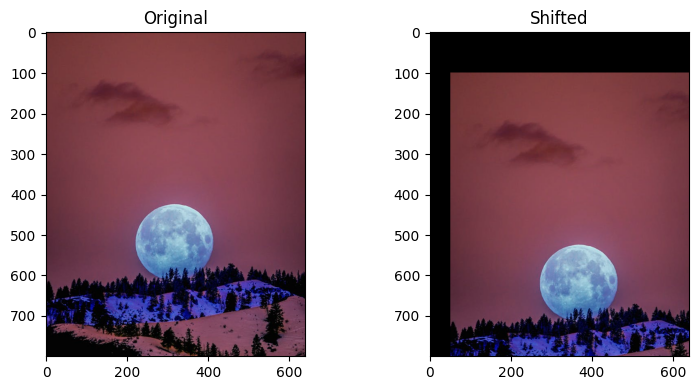

In [ ]:
import numpy as np
M = np.float32([[1, 0, 50], [0, 1, 100]])
original = cv2.imread('moon-pexels-frank-cone (2).jpg')
shifted = cv2.warpAffine(original, M, (original.shape[1], original.shape[0]))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(shifted, cmap='gray')
ax[1].set_title("Shifted")

fig.tight_layout()
plt.show()

Question 2
Implement the following types of image transformation with OpenCV functions:

1. Image resize
2.   Image rotation

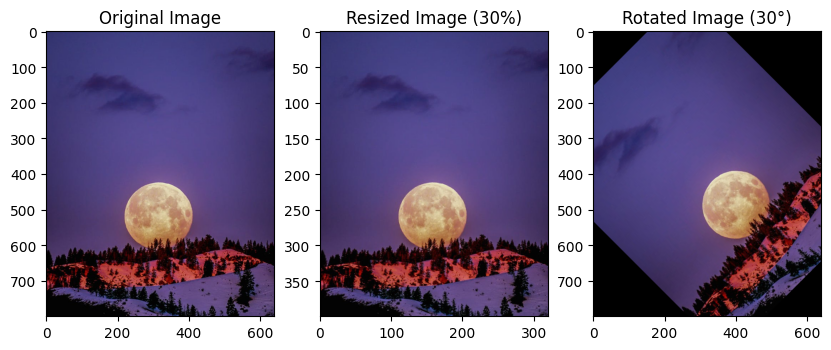

In [ ]:
# Importing required libraries
import cv2
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('moon-pexels-frank-cone (2).jpg')

# Convert from BGR (OpenCV default) to RGB for proper display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# 1. IMAGE RESIZE


# Resize the image to half of its original dimensions
resized_image = cv2.resize(image_rgb, (0, 0), fx=0.5, fy=0.5)


# 2. IMAGE ROTATION


# Get image height and width
(h, w) = image_rgb.shape[:2]

# Define the center of the image
center = (w // 2, h // 2)

# Create the rotation matrix (rotate by 45 degrees)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)

# Apply the rotation
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (w, h))

# ------------------------------------------
# Display original, resized, and rotated images
# ------------------------------------------
plt.figure(figsize=(10, 12))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(resized_image)
plt.title("Resized Image (30%)")

plt.subplot(1, 3, 3)
plt.imshow(rotated_image)
plt.title("Rotated Image (30°)")

plt.show()

## III. Image Data Loader

In this part, we'll focus on laoding datasets and work with full-sized images, similar to those captured by smartphone cameras.

We'll utilize the Kaggle dataset of cat and dog photos (check teh associated zip file) to demonstrate how to load and utilize images for training neural networks.

The easiest way to load image data is with `datasets.ImageFolder` from `torchvision`. In general you'll use ImageFolder like so:

`dataset = datasets.ImageFolder('path/to/data', transform=transform)`

where 'path/to/data' is the file path to the data directory and transform is a sequence of processing steps built with the transforms module from torchvision.

ImageFolder expects the files and directories to be constructed like so:

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

where each class has its own directory (cat and dog) for the images. The images are then labeled with the class taken from the directory name. So here, the image 123.png would be loaded with the class label cat. You can download the dataset already structured like this from here. I've also split it into a training set and test set.



In [ ]:
# Downlaod the cat and dog dataset
!wget https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2025-11-02 15:03:03--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.205.56, 52.216.44.240, 52.216.221.120, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.205.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip.1’

Cat_Dog_data.zip.1  100%[===================>] 553.60M  59.3MB/s    in 9.7s    

2025-11-02 15:03:13 (56.8 MB/s) - ‘Cat_Dog_data.zip.1’ saved [580495262/580495262]



In [ ]:
!unzip Cat_Dog_data.zip.1

Streaming output truncated to the last 5000 lines.
  inflating: Cat_Dog_data/train/dog/dog.8636.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.8636.jpg  
  inflating: Cat_Dog_data/train/dog/dog.7505.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.7505.jpg  
  inflating: Cat_Dog_data/train/dog/dog.1174.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.1174.jpg  
  inflating: Cat_Dog_data/train/dog/dog.9528.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.9528.jpg  
  inflating: Cat_Dog_data/train/dog/dog.1612.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.1612.jpg  
  inflating: Cat_Dog_data/train/dog/dog.8150.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.8150.jpg  
  inflating: Cat_Dog_data/train/dog/dog.7263.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.7263.jpg  
  inflating: Cat_Dog_data/train/dog/dog.11043.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.11043.jpg  
  inflating: Cat_Dog_data/train/dog/dog.634

With the `ImageFolder`` loaded, you have to pass it to a DataLoader`. The DataLoader takes a dataset (such as you would get from ImageFolder) and returns batches of images and the corresponding labels. You can set various parameters like the batch size and if the data is shuffled after each epoch.

```
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

To get data out of `dataloader`, you need to loop through it or convert it to an iterator and call next().

```
## Looping through it, get a batch on each loop
for images, labels in dataloader:
    pass

## Get one batch
images, labels = next(iter(dataloader))
```

## IV. Image Transforms

We shall focus on image transforms to augment our dataset.
When you load in the data with ImageFolder, you'll need to define some transforms.

For example, the images are different sizes but we'll need them to all be the same size for training. You can either resize them with `transforms.Resize()` or crop with `transforms.CenterCrop()`, `transforms.RandomResizedCrop()`, etc. We'll also need to convert the images to PyTorch tensors with `transforms.ToTensor()`.

Typically you'll combine these transforms into a pipeline with `transforms.Compose()`, which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

```
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
```

There are plenty of transforms available, study them in details.


In [ ]:
import torch
from torchvision import datasets, transforms

data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

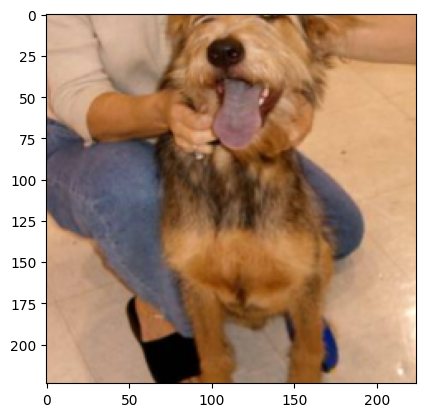

In [ ]:
# Display the images
# Run this to test your data loader
images, labels = next(iter(dataloader))
img = images[0].numpy().transpose((1, 2, 0))
plt.imshow(img, cmap='gray')
plt.show()


## Question 3

Load images from the Cat_Dog_data/train folder, define a few additional transforms, then build the dataloader.

In [ ]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision
dataset_path = '/content/Cat_Dog_data/train'


Number of training samples: 22500
Number of batches: 704
Classes: ['cat', 'dog']


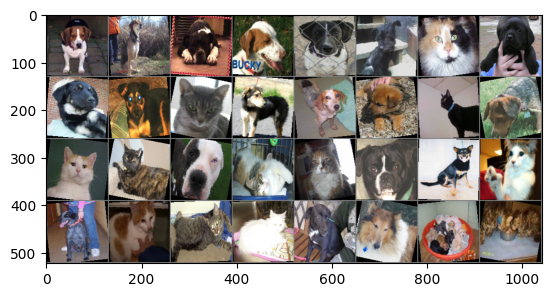

dog   dog   dog   dog   dog   dog   cat   dog  


In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print("Number of training samples:", len(train_dataset))
print("Number of batches:", len(train_loader))
print("Classes:", train_dataset.classes)
# Display a few images
dataiter = iter(train_loader)
images, labels = next(dataiter)

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{train_dataset.classes[labels[j]]:5s}' for j in range(8)))

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])
train_data = datasets.ImageFolder(root=data_dir, transform=train_transforms)
print(f"Total images found: {len(train_data)}")
print(f"Classes: {train_data.classes}")

Total images found: 22500
Classes: ['cat', 'dog']


Batch shape: torch.Size([32, 3, 128, 128])
Labels: tensor([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1])


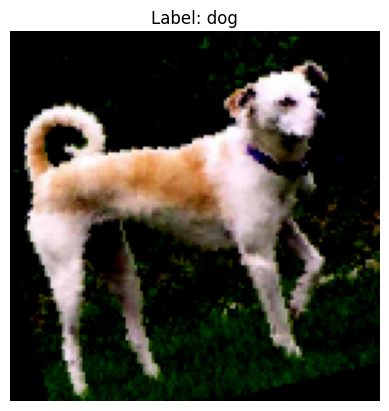

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
import matplotlib.pyplot as plt
import numpy as np

# Fetch one batch
images, labels = next(iter(train_loader))
print("Batch shape:", images.shape)
print("Labels:", labels)

# Display first image
plt.imshow(np.transpose(images[0], (1, 2, 0)))
plt.title(f"Label: {train_data.classes[labels[0]]}")
plt.axis('off')
plt.show()

Batch shape: torch.Size([32, 3, 128, 128])
Labels: tensor([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1])


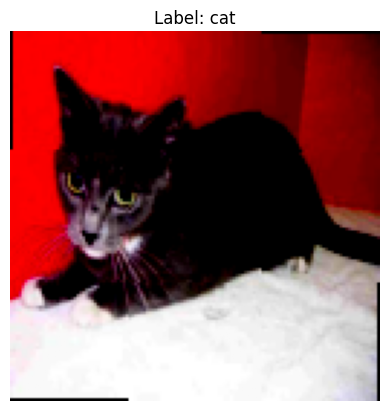

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch one batch
images, labels = next(iter(train_loader))
print("Batch shape:", images.shape)
print("Labels:", labels)

# Display first image
plt.imshow(np.transpose(images[0], (1, 2, 0)))
plt.title(f"Label: {train_data.classes[labels[0]]}")
plt.axis('off')
plt.show()

## V. MNIST Classification with CNN (PyTorch)

We have seen how to load image data. Once the image data is loaded with class labels, we can do image classification.

1. Instantiate classifier
2. Download & load MNIST

However, to make things simple, we shall run on a simpler and smaller dataset of handwritten digits, '0' to '9'. This dataset is famously called MNIST handwritten image dataset.


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.5MB/s]


In [ ]:
# Model: Define your network architecture here

from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        # Model instance creation and solver instance creation
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
# Train the network here

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.3434915552888788
Training loss: 0.1662586971041141
Training loss: 0.13842042628626056
Training loss: 0.11857697741487927
Training loss: 0.10833861707086201


## Question 4

Display a few images below to show how the MNIST dataset look like.

The next two steps are:

3. Build model
4. Train model

In [ ]:
!pip install -q tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 857.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 158.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 144.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
# Step 1: imports + load MNIST
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST from Keras (comes packaged with TF)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Check shapes
print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test: ", x_test.shape,  "y_test: ",  y_test.shape)


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train: (60000, 28, 28) y_train: (60000,)
x_test:  (10000, 28, 28) y_test:  (10000,)


In [ ]:
# Step 2: preprocess images
# Convert to float32, normalize to [0,1], and add channel dimension for CNN
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# If using Conv2D we want shape (batch, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)   # shape -> (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, -1)    # shape -> (10000, 28, 28, 1)

num_classes = 10


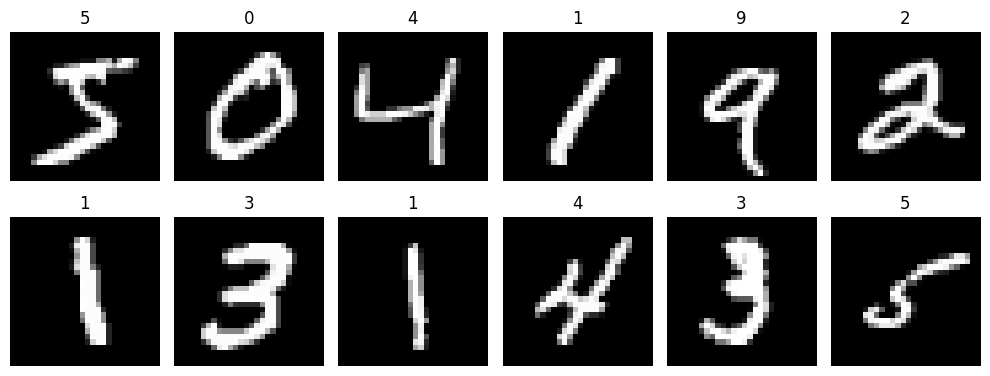

In [ ]:
# Step 3: display a grid of sample images
def show_samples(images, labels, n=12):
    plt.figure(figsize=(10,4))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(str(labels[i]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_samples(x_train, y_train, n=12)


In [ ]:
# Step 4: build a small convolutional model
def build_mnist_cnn():
    model = models.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_mnist_cnn()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 5: compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # labels are integers 0..9
    metrics=['accuracy']
)


In [ ]:
# Step 6: train
# optional: use a validation split, early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

history = model.fit(
    x_train, y_train,
    epochs=12,
    batch_size=128,
    validation_split=0.1,
    callbacks=callbacks
)


Epoch 1/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.8215 - loss: 0.5699 - val_accuracy: 0.9843 - val_loss: 0.0558
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9735 - loss: 0.0885 - val_accuracy: 0.9883 - val_loss: 0.0421
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9801 - loss: 0.0627 - val_accuracy: 0.9882 - val_loss: 0.0395
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9856 - loss: 0.0477 - val_accuracy: 0.9892 - val_loss: 0.0350
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9884 - loss: 0.0367 - val_accuracy: 0.9920 - val_loss: 0.0296
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9889 - loss: 0.0340 - val_accuracy: 0.9913 - val_loss: 0.0315
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9920 - loss: 0.0272 - val_accuracy: 0.9915 - val_loss: 0.0296
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9919 - loss: 0.0253 - 

In [ ]:
# Step 7: evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")


313/313 - 1s - 3ms/step - accuracy: 0.9928 - loss: 0.0229
Test accuracy: 0.9928, Test loss: 0.0229


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


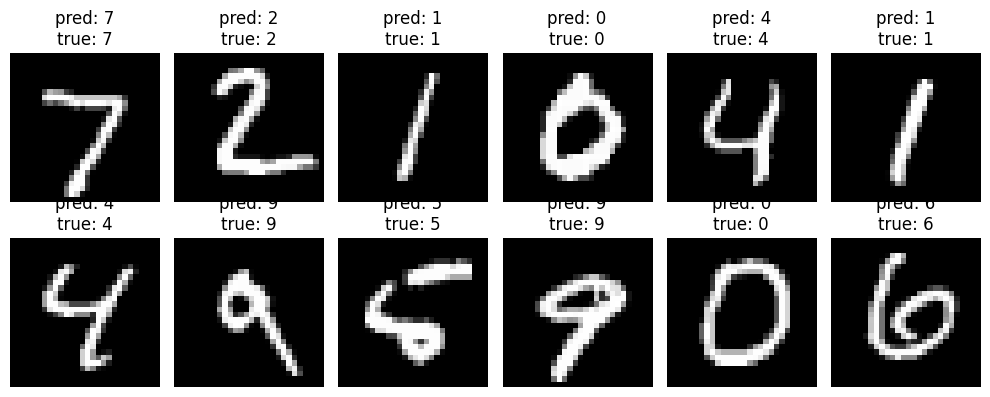

In [ ]:
# Step 8: sample predictions visualization
preds = model.predict(x_test[:12])
pred_labels = preds.argmax(axis=1)

plt.figure(figsize=(10,4))
for i in range(12):
    plt.subplot(2,6,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"pred: {pred_labels[i]}\ntrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


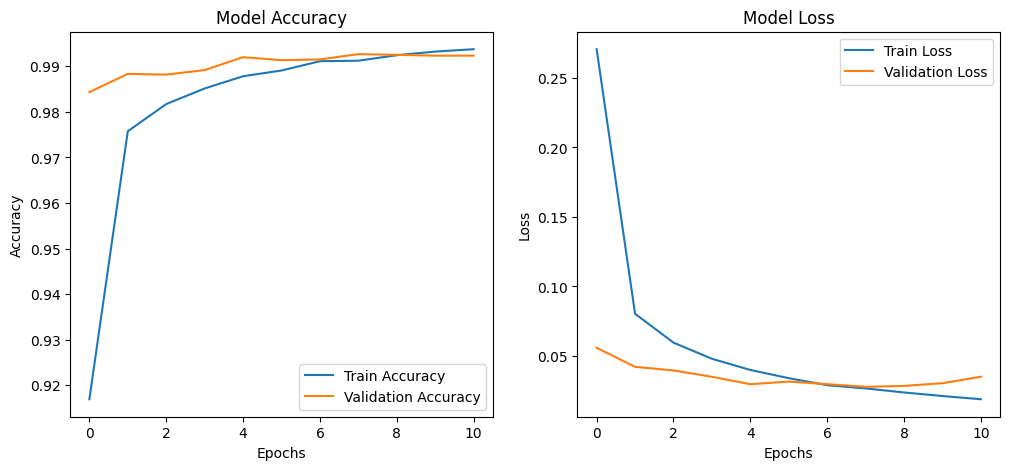

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<Figure size 800x800 with 0 Axes>

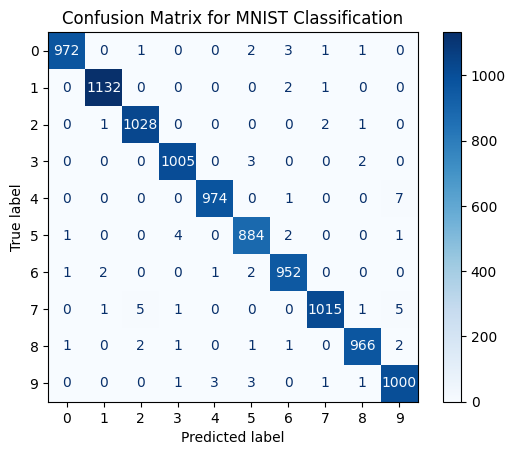

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on all test images
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display it nicely
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()


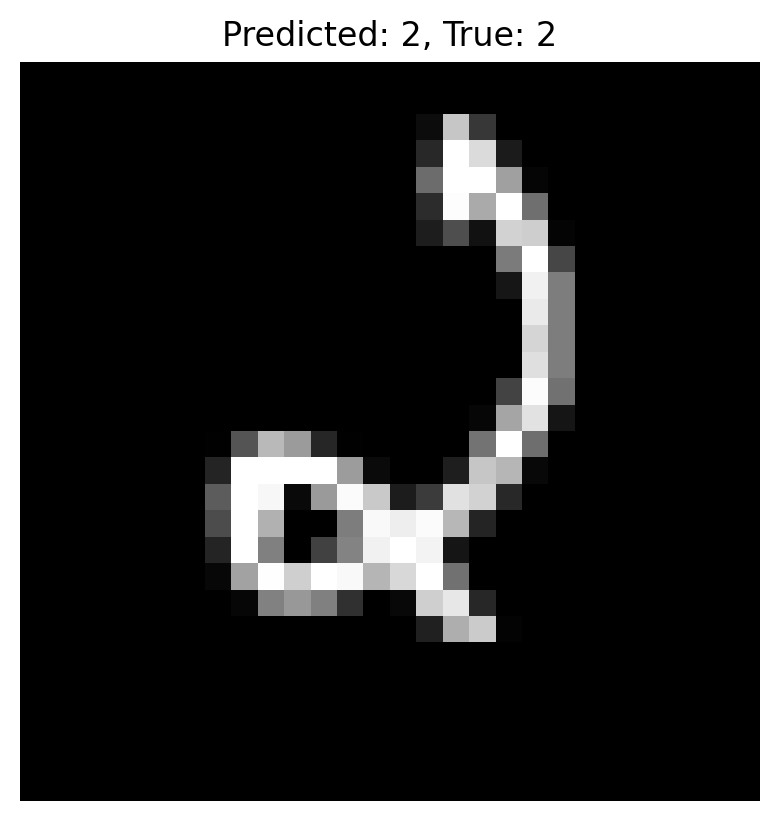

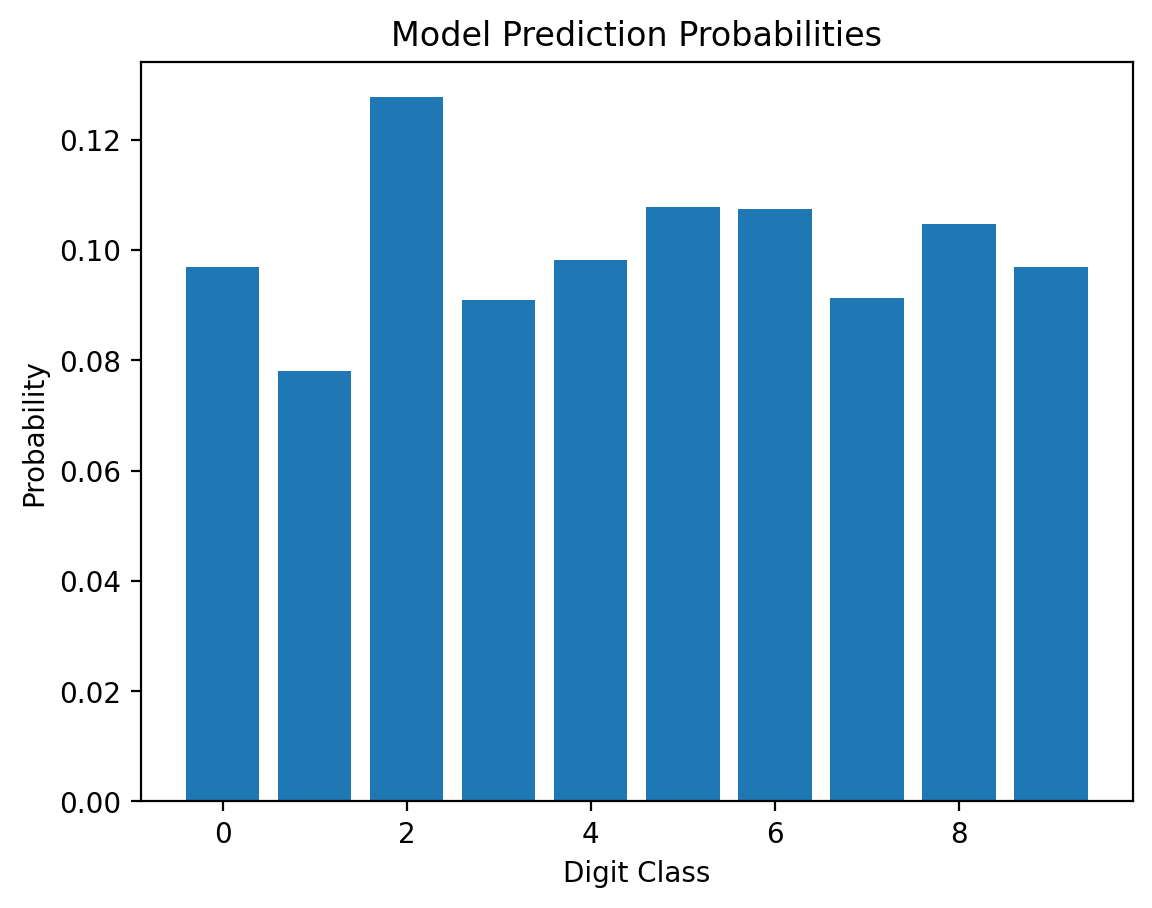

In [ ]:
import torch
import matplotlib.pyplot as plt

# Make sure your model and test_loader exist before running this block
# Example: model = trained CNN model
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 1️⃣ Get a batch of test images and labels
images, labels = next(iter(test_loader))

# 2️⃣ Select one image and label (you can change idx to test others)
idx = 2
img = images[idx]
true_label = labels[idx].item()

# 3️⃣ Put model in evaluation mode and predict
model.eval()
with torch.no_grad():
    output = model(img.unsqueeze(0))  # add batch dimension
    ps = torch.exp(output)             # softmax probabilities
    pred_class = torch.argmax(ps, dim=1).item()

# 4️⃣ Show the image and predicted result
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"Predicted: {pred_class}, True: {true_label}")
plt.axis("off")
plt.show()

# 5️⃣ Optional: show class probabilities as a bar chart
plt.bar(range(10), ps.numpy().squeeze())
plt.xlabel("Digit Class")
plt.ylabel("Probability")
plt.title("Model Prediction Probabilities")
plt.show()


## VI. MNIST Classification with CNN (Tensorflow-Keras)

We shall now train the MNIST classifier using the Tensorflow-Keras module

## Question 5

Write the entire MNIST image classification code using an object oriented approach using the Tensorflow Keras library
as below.

Importthe approproite modules.


```
class MNISTClassifier:
    def __init__(self):
        self.model: tf.keras.Model | None = None

    def load_data(self):
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.____()
        x_train = (x_train.astype("float32") / 255.0)[..., ____]
        x_test  = (x_test.astype("float32") / 255.0)[..., ____]
        return (x_train, y_train), (x_test, y_test)

    def build_model(self):
        self.model = ____.Sequential([
            ____.Conv2D(____, (3,3), activation="relu", input_shape=(28,28,1)),
            ____.MaxPooling2D((2,2)),
            ____.Conv2D(____, (3,3), activation="relu"),
            ____.MaxPooling2D((2,2)),
            ____.Flatten(),
            ____.Dense(____, activation="relu"),
            ____.Dense(____, activation="softmax"),
        ])
        self.model.compile(optimizer="adam",
                           loss="____",
                           metrics=[____])

    def train(self, x_train, y_train, epochs=____, batch_size=____):
        self.model.____(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    def evaluate(self, x_test, y_test):
        _, acc = self.model.____(x_test, y_test, verbose=0)
        print(f"Test Accuracy: {acc:.4f}")
        return acc

    def predict_with_opencv(self, x_test, y_test, num_samples=3, out_dir="mnist_opencv_samples", display=False):
        os.makedirs(out_dir, exist_ok=True)
        for i in range(num_samples):
            digit = (x_test[i] * 255).astype("uint8").squeeze(axis=-1)
            label = int(y_test[i])
            filename = os.path.join(out_dir, f"digit_{i}_label_{label}.png")
            ____.imwrite(filename, digit)

            img = ____.imread(filename, ____)
            img = ____.resize(img, (28, 28))
            img = img.astype("float32")/255.0
            img = np.expand_dims(img, axis=(0, -1))

            probs = self.model.____(img, verbose=0)
            pred_class = int(np.argmax(probs, axis=-1)[0])
            print(f"Sample {i}: True={label} | Pred={pred_class}")

            if display:
                try:
                    ____.imshow("digit", (img[0,...,0]*255).astype("uint8"))
                    ____.waitKey(500)
                    ____.destroyAllWindows()
                except ____.error:
                    print("GUI not available")

def run_step(step_no, title, func, *args, **kwargs):
    print(f"\n[Step {step_no}] {title}")
    result = func(*args, **kwargs)
    print(f"[Step {step_no}] Completed.")
    return result

```

And lastly the main code to execute all parts is written below.

```

EPOCHS = #set epoch number
BATCH_SIZE = 64

clf = run_step(1, "Instantiate classifier", ____)
(x_train,y_train), (x_test,y_test) = run_step(2, "Load MNIST", clf.____)
run_step(3, "Build model", clf.____)
run_step(4, "Train", clf.____, x_train, y_train, EPOCHS, BATCH_SIZE)
run_step(5, "Evaluate", clf.____, x_test, y_test)
run_step(6, "Predict with OpenCV", clf.____, x_test, y_test, 3)

```

In [ ]:
# Optional: install/update OpenCV if you get errors later
!pip install -q opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 27.7 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2

def run_step(step_no, title, func, *args, **kwargs):
    print(f"\n[Step {step_no}] {title}")
    result = func(*args, **kwargs)
    print(f"[Step {step_no}] Completed.")
    return result


In [ ]:
class MNISTClassifier:
    def __init__(self):
        # use Python 3.10+ style annotation if available; otherwise it's fine without it
        self.model: tf.keras.Model | None = None

    def load_data(self):
        # load_data() - loads (x_train, y_train), (x_test, y_test)
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        # normalize to [0,1] and add channel dimension for Conv2D
        x_train = (x_train.astype("float32") / 255.0)[..., np.newaxis]
        x_test  = (x_test.astype("float32") / 255.0)[..., np.newaxis]
        return (x_train, y_train), (x_test, y_test)

    def build_model(self):
        # build a simple CNN for MNIST
        self.model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D((2,2)),
            tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
            tf.keras.layers.MaxPooling2D((2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(10, activation="softmax"),
        ])
        self.model.compile(optimizer="adam",
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

    def train(self, x_train, y_train, epochs=5, batch_size=64):
        # train the model
        self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    def evaluate(self, x_test, y_test):
        # evaluate and return accuracy
        _, acc = self.model.evaluate(x_test, y_test, verbose=0)
        print(f"Test Accuracy: {acc:.4f}")
        return acc

    def predict_with_opencv(self, x_test, y_test, num_samples=3, out_dir="mnist_opencv_samples", display=False):
        # create folder for images
        os.makedirs(out_dir, exist_ok=True)
        for i in range(num_samples):
            # convert normalized image back to 0-255 uint8 and save
            digit = (x_test[i] * 255).astype("uint8").squeeze(axis=-1)
            label = int(y_test[i])
            filename = os.path.join(out_dir, f"digit_{i}_label_{label}.png")
            cv2.imwrite(filename, digit)

            # read back using OpenCV as grayscale
            img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
            # ensure 28x28 (in case)
            img = cv2.resize(img, (28, 28))
            # normalize to [0,1] and add batch+channel dims for model
            img = img.astype("float32")/255.0
            img = np.expand_dims(img, axis=(0, -1))

            # predict probabilities
            probs = self.model.predict(img, verbose=0)
            pred_class = int(np.argmax(probs, axis=-1)[0])
            print(f"Sample {i}: True={label} | Pred={pred_class}")

            # optional display (may not work in some headless environments)
            if display:
                try:
                    cv2.imshow("digit", (img[0,...,0]*255).astype("uint8"))
                    cv2.waitKey(500)
                    cv2.destroyAllWindows()
                except cv2.error:
                    print("GUI not available")


In [ ]:
# settings
EPOCHS = 5         # set this higher (e.g., 10) if you want better accuracy
BATCH_SIZE = 64

# instantiate classifier (use run_step to show progress)
clf = run_step(1, "Instantiate classifier", lambda: MNISTClassifier())
# load mnist
(x_train,y_train), (x_test,y_test) = run_step(2, "Load MNIST", clf.load_data)
# build the model
run_step(3, "Build model", clf.build_model)
# train
run_step(4, "Train", clf.train, x_train, y_train, EPOCHS, BATCH_SIZE)
# evaluate
run_step(5, "Evaluate", clf.evaluate, x_test, y_test)
# predict on a few samples with OpenCV roundtrip
run_step(6, "Predict with OpenCV", clf.predict_with_opencv, x_test, y_test, 3)



[Step 1] Instantiate classifier
[Step 1] Completed.

[Step 2] Load MNIST
[Step 2] Completed.

[Step 3] Build model
[Step 3] Completed.

[Step 4] Train


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 - 17s - 18ms/step - accuracy: 0.9508 - loss: 0.1615
Epoch 2/5
938/938 - 16s - 17ms/step - accuracy: 0.9846 - loss: 0.0491
Epoch 3/5
938/938 - 16s - 17ms/step - accuracy: 0.9891 - loss: 0.0346
Epoch 4/5
938/938 - 16s - 17ms/step - accuracy: 0.9919 - loss: 0.0250
Epoch 5/5
938/938 - 16s - 17ms/step - accuracy: 0.9940 - loss: 0.0193
[Step 4] Completed.

[Step 5] Evaluate
Test Accuracy: 0.9902
[Step 5] Completed.

[Step 6] Predict with OpenCV
Sample 0: True=7 | Pred=7
Sample 1: True=2 | Pred=2
Sample 2: True=1 | Pred=1
[Step 6] Completed.
